In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
print(tf. __version__)

2.3.0


In [11]:
print("Num GPU Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPU Available:  1


In [12]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

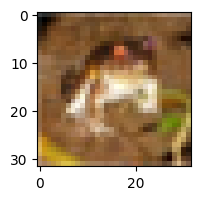

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Lets plot some of the images using a fuction

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

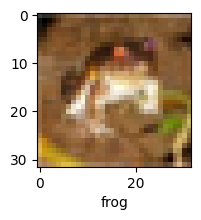

In [20]:
plot_sample(X_train,y_train,0)

Normalizing the training data

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

### Now Lets build convolutional neural network

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9125 - accuracy: 0.6821
Epoch 2/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8724 - accuracy: 0.6948
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8397 - accuracy: 0.7060
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8119 - accuracy: 0.7167
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7838 - accuracy: 0.7265
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7617 - accuracy: 0.7330
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7364 - accuracy: 0.7445
Epoch 8/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7153 - accuracy: 0.7503
Epoch 9/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6962 - accuracy: 0.7522
Epoch 10/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.675